## Looking at NDVI values as a function of the angle of the sun.

Even though NDVI is a normalised quantity (difference between the intensity in 2 bands divided by the sum) with a potential range between -1 and 1, in practice we do see variations in brightness between images taken at the same location at different times.

We examine the metadata in the image collection "COPERNICUS/S2", in particular the "MEAN_SOLAR_ZENITH_ANGLE" which represents the angle (in degrees) between the direction of the sun and the normal vector to the Earth's surface (i.e. with an angle of 0, the sun would be directly overhead.

In [1]:
import matplotlib.pyplot as plt


In [2]:
image_coll="COPERNICUS/S2"
start_date="2016-01-01"
end_date="2017-12-31"
coords=[27.99,11.2878] 
bands=["B4","B3","B2","NDVI"]
region_size=0.1
output_dir="../output_dir"
num_time_points=2
mask_cloud=True
scale=10

In [ ]:
from pyveg.src import satellite_data_analysis

In [ ]:
help(satellite_data_analysis.get_time_series)

In [ ]:
satellite_data_analysis.get_time_series(num_time_points,
                                        coords,
                                        image_coll,
                                        bands,
                                        region_size,
                                        scale,
                                        start_date,
                                        end_date,
                                        mask_cloud,
                                        output_dir
                                       )

This will have put some files into "output_dir".   The ones we want are the json files '<something>_solar_angles.json' and '<something>_NDVI_vals.json'.

In [3]:
import os
import json

In [4]:
filenames = os.listdir(output_dir)
angle_val_dict = {}
for filename in filenames:
    if not filename.endswith(".json"):
        continue
    filebase = filename.split("_")[0]
    if not filebase in angle_val_dict.keys():
        angle_val_dict[filebase] = {}
    print("filename is {}".format(filename))
    if "solar_angles" in filename:
        angle_val_dict[filebase]["zenith_angle"] = json.load(open(os.path.join(output_dir,filename)))["zenith_angle"]
    elif "NDVI_vals" in filename:
        angle_val_dict[filebase]["NDVI"] = json.load(open(os.path.join(output_dir, filename)))["NDVI"]
    else:
        print("What is this {}".format(filename))

filename is 09bb0e62f1677f32c88a31bc0986fc01_NDVI_vals.json
filename is 09bb0e62f1677f32c88a31bc0986fc01_solar_angles.json
filename is 0d3b3b80106d35572cee12a434800717_NDVI_vals.json
filename is 0d3b3b80106d35572cee12a434800717_solar_angles.json
filename is 3932ee656538a24ecae724ada68aabb4_NDVI_vals.json
filename is 3932ee656538a24ecae724ada68aabb4_solar_angles.json
filename is 4e8072179f74ab1aac63601d6ae1cf3d_NDVI_vals.json
filename is 4e8072179f74ab1aac63601d6ae1cf3d_solar_angles.json
filename is 68cb5d3b7bcf9c621502ceb579b0cbd4_NDVI_vals.json
filename is 68cb5d3b7bcf9c621502ceb579b0cbd4_solar_angles.json
filename is 7d0f94d85f695f3430a8f433516e10ac_NDVI_vals.json
filename is 7d0f94d85f695f3430a8f433516e10ac_solar_angles.json
filename is 7dd12d0f2c3cfccec9ba825cb774a41b_NDVI_vals.json
filename is 7dd12d0f2c3cfccec9ba825cb774a41b_solar_angles.json
filename is 8f9afb210fe49213141e5a05b0d0eac5_NDVI_vals.json
filename is 8f9afb210fe49213141e5a05b0d0eac5_solar_angles.json
filename is 9716

In [6]:
angles = [angle_val_dict[k]["zenith_angle"] for k in angle_val_dict.keys()]

angles

[30.57112476499148,
 26.0139630744227,
 21.1852561869037,
 32.72059107586793,
 32.6313559423711,
 22.5287464364,
 30.09590402256,
 22.5468996320355,
 38.54849947581143,
 20.96349130155,
 23.019850141749725,
 37.67894404239334,
 22.76565207085,
 19.59771838,
 20.51323333055025,
 39.64650258039558,
 36.87146374889796]

In [7]:
vals = [angle_val_dict[k]["NDVI"] for k in angle_val_dict.keys()]
len(vals)

17

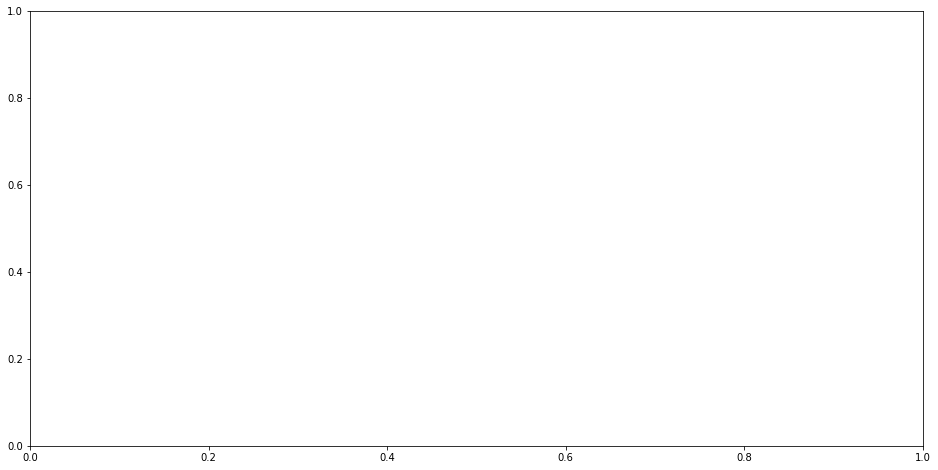

In [8]:
fig, ax = plt.subplots(1,1,figsize=(16,8))

In [9]:
ax.violinplot(vals,positions=angles)

{'bodies': [<matplotlib.collections.PolyCollection at 0x1616604d0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x119d42910>,
 'cmins': <matplotlib.collections.LineCollection at 0x16169b650>,
 'cbars': <matplotlib.collections.LineCollection at 0x16169ba10>}

In [10]:
plt.show()